<a href="https://colab.research.google.com/github/elinteerie/Models/blob/main/Deep_Learning_on_WineQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [7]:
import pandas as pd

red_wine = pd.read_csv('/content/drive/MyDrive/datafiles/winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
red_wine.shape

(1599, 12)

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'loss',
    min_delta=0.001,
    patience=20, 
    restore_best_weights=True,
)

In [88]:

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(units=512, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])


model.compile(optimizer='Adamax', loss = 'mae')

In [31]:
from sklearn.model_selection import train_test_split 

In [19]:
X = red_wine.drop('quality', axis = 1)
y = red_wine['quality']

In [20]:
X_train, X_test, y_train, y_test = train_test_split (X,y, random_state = 42)

In [92]:
ugo = model.fit(X_train, y_train, epochs = 150, callbacks=[early_stopping])
model.summary()

Epoch 1/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4321
Epoch 2/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4284
Epoch 3/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4180
Epoch 4/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4303
Epoch 5/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4212
Epoch 6/150
38/38 [==============================] - 0s 2ms/step - loss: 0.4163
Epoch 7/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4196
Epoch 8/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4273
Epoch 9/150
38/38 [==============================] - 0s 2ms/step - loss: 0.4379
Epoch 10/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4397
Epoch 11/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4257
Epoch 12/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4274
Epoch 13/150
38/38 [=================

In [50]:
y_pred = model.predict(X_test)
y_true= y_test

In [69]:
y_pred

array([[5.216195 ],
       [5.0741024],
       [5.723064 ],
       [5.374981 ],
       [5.6814537],
       [5.205823 ],
       [4.985531 ],
       [5.319718 ],
       [5.503193 ],
       [5.7733803],
       [6.2571177],
       [5.321949 ],
       [5.356605 ],
       [5.058801 ],
       [5.2807817],
       [6.726589 ],
       [5.1253023],
       [5.5824833],
       [6.328953 ],
       [5.233633 ],
       [5.5179157],
       [5.0925016],
       [5.9991913],
       [6.255014 ],
       [5.2643757],
       [5.3717823],
       [6.4735026],
       [5.38717  ],
       [4.9902077],
       [5.9596214],
       [5.164794 ],
       [5.2847066],
       [5.4956245],
       [5.3462124],
       [5.4260254],
       [4.9451914],
       [6.0991416],
       [5.6217084],
       [5.8082952],
       [6.299074 ],
       [5.66543  ],
       [5.094122 ],
       [5.8979883],
       [5.084484 ],
       [5.477851 ],
       [5.7033463],
       [6.151847 ],
       [5.5338497],
       [5.375352 ],
       [5.47212  ],


In [70]:
y_test

803     6
124     5
350     6
682     5
1326    6
       ..
1565    6
327     5
254     6
322     5
1160    7
Name: quality, Length: 400, dtype: int64

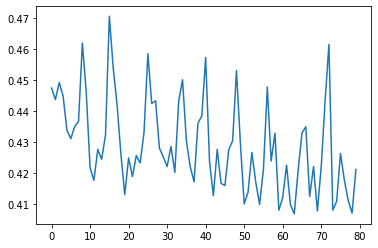

In [67]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(ugo.history)
# use Pandas native plot method
history_df['loss'].plot();